![title](../images/header.png)

Merging CEO data phase II (2015-2022)
-------
This notebook merges validated data from different CEO CAFI projects
###### For more information contact aurelie.shapiro@fao.org or remi.dannunzio@fao.org

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set the display option to a large value to prevent text wrapping
pd.set_option('display.max_colwidth', None)

## Enter parameters

In [3]:
#identifier for country 
# COD COG CMR GAB EQG CAF
iso = 'EQG'

### 1. Read all CEO sample files
download your CEO sample files from collect.earth and upload to SEPAL using FileZilla.
add as many files as you have projects

In [6]:
#DRC
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-2-sample-data.csv')
#ceo3 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-3-sample-data.csv')
#GAB
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-2-sample-data.csv')
#ceo3 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-3-sample-data.csv')
#ceo4 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-4-sample-data.csv')
#ceo5 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-5-sample-data.csv')
#EQG
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/EQG/ceo-CAFI-DDD-Equatorial-Guinea-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/EQG/ceo-CAFI-DDD-Equatorial-Guinea-eSBAE-validation-2-sample-data.csv')
ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/EQG/ceo-CAFI-DDD-EQG-eSBAE-2023-collection-1-sample-data.csv')
ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/EQG/ceo-CAFI-DDD-EQG-eSBAE-2023-collection-2-sample-data.csv')
#COG
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/COG/COG_all_ceo_1522_1622_clean.csv')
#CMR
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/CMR/ceo-CAFI-DDD-Cameroun-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/CMR/ceo-CAFI-DDD-Cameroun-eSBAE-validation-2-sample-data.csv')
#CAR
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/CAR/ceo-CAFI-DDD-RCA-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/CAR/ceo-CAFI-DDD-RCA-eSBAE-validation-2-sample-data.csv')

make a list of the ceo files for processing

In [7]:
#depends on how many files you have
# if you have 5 files
#ceo_files = [ceo1, ceo2, ceo3, ceo4, ceo5]
# if you have 3 files
#ceo_files = [ceo1, ceo2, ceo3]
# if you have 2 files
ceo_files = [ceo1,ceo2]
# if you have 1 file
#ceo_files = [ceo1]

In [9]:
# output file  CEO validated data file with select columns
ceo_data_out =  '/home/sepal-user/module_results/esbae/EQG/EQG_all_ceo_2223_clean.csv'

### end of parameters

In [11]:
column_names = ceo1.columns.tolist()
# Print the list of column names
print(column_names)

['plotid', 'sampleid', 'sample_internal_id', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 'imagery_title', 'imagery_attributions', 'sample_geom', 'pl_index', 'pl_chgprob', 'pl_maxforprob', 'pl_strata', 'forêt ou non-forêt en 2022', "Y'a t'il de la régéneration", 'Changement en 2023', 'Type de Changement 2023', 'Exploitation forestière artisanale (<5ha)', 'Activité minière artisanale', 'Infrastructure routière', 'Infrastructure d’urbanisation ou habitations', 'Exploitation forestière industrielle (>5ha)', 'Autre moteur', 'Descriptif autre moteur', 'Activité minière industrielle', 'Agriculture industrielle', 'Agriculture paysanne', 'Année de Changement', 'Type de non-forêt en 2022', 'Type de forêt en 2022', 'Commentaires']


##### add a column named "interpreted" which = 1 when the point has been validated in CEO, otherwise 0
count the number of validated points per ceo file
replace forest and non-forest types with codes

In [12]:
# List to store the modified DataFrames
modified_ceo_files = []

# Initialize collection counter
collection_counter = 1

for i, ceo in enumerate(ceo_files):
       
    # Sort the DataFrame by 'date' in descending order
    ceo.sort_values(by='collection_time', ascending=True, inplace=True)

    # Remove duplicates keeping the last occurrence (the most recent date)
    ceo.drop_duplicates(subset='plotid', keep='first', inplace=True)

    # Reset the index
    ceo.reset_index(drop=True, inplace=True)
    
    # Add 'collection' column with an increasing number
    ceo['collection'] = collection_counter
    
    # Add 'interpreted' column with 1 when 'email' is not null, otherwise 0
    ceo['interpreted'] = np.where(ceo['email'].notna(), 1, 0)
    
    # Calculate total count for each 'interpreted' value
    interpreted_counts = ceo['interpreted'].value_counts().to_dict()
    
    # Append the modified DataFrame to the list
    modified_ceo_files.append(ceo)
    
    # Print count for the current DataFrame
    print(f"ceo {i + 1} # of validated points: {interpreted_counts.get(1, 0)}, # of not validated points: {interpreted_counts.get(0, 0)}")
    
    # Increment the collection counter
    collection_counter += 1

# Concatenate the modified DataFrames into one merged DataFrame
merged_ceo = pd.concat(modified_ceo_files, ignore_index=True)


# Specify the columns you want to keep in the merged DataFrame
columns_to_keep = ['plotid', 'sampleid', 'lon', 'lat', 
                    'sample_geom', 'forêt ou non-forêt en 2015?', "Y'a t'il de la régéneration", 
                    'Changement entre 2015-2022', 'Type de Changement (2015-2022)', 'Exploitation forestière artisanale (<5ha)', 
                    'Activité minière artisanale', 'Infrastructure routière', 'Infrastructure d’urbanisation ou habitations', 
                    'Exploitation forestière industrielle (>5ha)', 'Autre moteur', 'Descriptif autre moteur', 'Activité minière industrielle', 
                    'Agriculture industrielle', 'Agriculture paysanne', 'Année de Changement', 'Type de non-forêt en 2015', 'Type de forêt en 2015', 'collection', 'interpreted']

# Select only the specified columns
merged_ceo = merged_ceo[columns_to_keep]

# Create a dictionary to map old column names to new column names
column_mapping = {
    'forêt ou non-forêt en 2015?': 'Ref_FNF_2015', 
    "Y'a t'il de la régéneration": 'Ref_Regeneration',
    'Changement entre 2015-2022': 'Ref_Change_1522', 
    'Type de Changement (2015-2022)': 'Ref_Change_Type_1522', 
    'Exploitation forestière artisanale (<5ha)': 'ArtFor',
    'Activité minière artisanale': 'ArtMine',
    'Infrastructure routière': 'InfraR', 
    'Infrastructure d’urbanisation ou habitations': 'Urb',
    'Exploitation forestière industrielle (>5ha)':'IndFor', 
    'Autre moteur': 'Other', 
    'Descriptif autre moteur': 'Other_Desc', 
    'Activité minière industrielle': 'IndMine', 
    'Agriculture industrielle': 'IndAg', 
    'Agriculture paysanne': 'ArtAg', 
    'Année de Changement': 'Ref_Year_1522', 
    'Type de non-forêt en 2015':'Ref_NFtype_2015', 
    'Type de forêt en 2015':'Ref_Ftype_2015'
    #add other columns as needed
    #,'NOM': 'Province' # DRC province
}

# Use the rename() method to rename the columns
merged_ceo = merged_ceo.rename(columns=column_mapping)

# Define the replacements as a dictionary
replace_dict = {
    'Ref_FNF_2015': {'non-forêt': '0', 'forêt': '1'},
    'Ref_Ftype_2015': {'1 - forêt dense': '1', '2 - forêt dense sèche': '2', '3 - forêt secondaire': '3','4 - forêt claire sèche': '4','7 - forêt mangrove': '7',
                 '8 - forêt marécageuse': '8', '9 - forêt galérie': '9','10 - plantation forestière': '10', '11- savane arborée': '11'},
    'Ref_NFtype_2015': {'12 - savane arbustive': '12', '13 - savane herbacée': '13', '14 - prairie aquatique': '14', '15 - sol nu végétation éparse': '15',
                  '16 - terres cultivées': '16', '17 - zone baties': '17', '18 - eau': '18'},
    'Ref_Change_1522': {'oui':'1','non':'0','':'0'},
    'ArtFor':{'oui':'1','non':'0','':'0'},
    'IndFor':{'oui':'1','non':'0','':'0'},
    'ArtAg':{'oui':'1','non':'0','':'0'},
    'IndAg':{'oui':'1','non':'0','':'0'},
    'ArtMine':{'oui':'1','non':'0','':'0'},
    'IndMine':{'oui':'1','non':'0','':'0'},
    'Urb':{'oui':'1','non':'0','':'0'},
    'InfraR':{'oui':'1','non':'0','':'0'},
    'Other':{'oui':'1','non':'0','':'0'}
}

# Use the replace() method to replace strings in specified columns
merged_ceo.replace(replace_dict, inplace=True)


columns_to_fill = ['Ref_Change_1522','ArtAg','ArtFor','IndFor','IndAg','ArtMine','IndMine','Urb','InfraR','Other']
# Set NaN values in the selected columns to 0
merged_ceo[columns_to_fill] = merged_ceo[columns_to_fill].fillna('0')
merged_ceo['collection'] = 'coll_1522_' + merged_ceo['collection'].astype(str)

ceo 1 # of validated points: 247, # of not validated points: 0
ceo 2 # of validated points: 155, # of not validated points: 342


KeyError: "['forêt ou non-forêt en 2015?', 'Changement entre 2015-2022', 'Type de Changement (2015-2022)', 'Type de non-forêt en 2015', 'Type de forêt en 2015'] not in index"

remove non validated points and remove duplicates

In [14]:
merged_ceo_interpreted = merged_ceo[merged_ceo['interpreted'] == 1]

In [15]:
ceo_column_names = merged_ceo_interpreted.columns.tolist()
# Print the list of column names
print(ceo_column_names)

['plotid', 'sampleid', 'lon', 'lat', 'sample_geom', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year_1522', 'Ref_NFtype', 'Ref_Ftype', 'collection', 'interpreted']


In [16]:
merged_ceo_interpreted.head()

,plotid,sampleid,lon,lat,sample_geom,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year_1522,Ref_NFtype,Ref_Ftype,collection,interpreted
0,45,45,8.460650,3.453988,POINT(8.46065 3.453988),1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1,1,1
1,65,65,8.431363,3.357773,POINT(8.431363 3.357773),1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1,1,1
2,117,117,8.441585,3.319245,POINT(8.441585 3.319245),1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1,1,1
3,108,108,8.490696,3.434682,POINT(8.490696 3.434682),1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1,1,1
4,122,122,8.466201,3.367339,POINT(8.466201 3.367339),1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1,1,1


In [18]:
merged_ceo_interpreted = merged_ceo_interpreted.sort_values(by='collection', ascending=True)

# Remove duplicates keeping the last occurrence (the most recent date)
merged_ceo_nodup = merged_ceo_interpreted.drop_duplicates(subset='plotid', keep='first')

# Reset the index
merged_ceo_nodup = merged_ceo_nodup.reset_index(drop=True)

##### count points in different categories

In [19]:
merged_ceo_nodup['interpreted'].value_counts(dropna=False)

interpreted
1    4724
Name: count, dtype: int64

In [22]:
pd.pivot_table(merged_ceo_nodup,values='plotid',index=['Ref_Change_1522'],columns=['interpreted'],aggfunc="count")

interpreted,1
Ref_Change_1522,
0,4398
1,326


In [23]:
merged_ceo_nodup['Ref_FNF_2015'].value_counts(dropna=False)

Ref_FNF_2015
1      3604
0       878
NaN     242
Name: count, dtype: int64

In [24]:
merged_ceo_nodup['Ref_Change_Type_1522'].value_counts(dropna=False)

Ref_Change_Type_1522
NaN              4398
déforestation     193
dégradation       133
Name: count, dtype: int64

In [16]:
merged_ceo_nodup['collection'].value_counts(dropna=False)

collection
2    6678
3    5971
1     498
Name: count, dtype: int64

##### create a LC type column

In [17]:
merged_ceo_nodup['Ref_LCover'] = merged_ceo_nodup['Ref_Ftype'].fillna(merged_ceo_nodup['Ref_NFtype'])
merged_ceo_nodup['Ref_LCover'].value_counts(dropna=False)

Ref_LCover
16    3355
4     2420
13    1608
1     1534
3     1306
2     1012
12     707
9      398
18     233
15     226
14     127
8       91
11      83
17      41
10       3
7        3
Name: count, dtype: int64

##### Check if values in 'pointid' are unique

In [18]:
# this might take some time
unique_check = merged_ceo_nodup['point_id'].nunique() == len(merged_ceo_nodup['point_id'])

# Print the result
if unique_check:
    print("All values are unique!")
else:
    print("F$%§!")

All values are unique!


##### if there are duplicates determine which points and which project (collection) and fix these in CEO: find the point id and enter the same correct interpretation for both users

In [19]:
# Find duplicate values in the 'ID' column
#duplicate_ids = merged_ceo_nodup[merged_ceo_nodup.duplicated(subset='point_id', keep='first')]

# If you want to print specific columns along with duplicates, you can do:
# For example, print only 'ID' and 'Name' columns
#print("\nDuplicate Rows with 'ID' and 'Name':")
#print(duplicate_ids[['point_id', 'collection']])
#len(duplicate_ids)

In [20]:
#merged_ceo_nodup.head()

### 2. add new columns for change and year

clean up columns and replace values

In [21]:
def f(x):
  if x['Ref_FNF_2015'] == '0' : return 'NF'
  elif x['Ref_Change_Type_1522'] == 'déforestation': return 'Def'
  elif x['Ref_Change_Type_1522'] == 'dégradation' : return 'Deg'
  else: return 'Stable'

merged_ceo_nodup['Ref_Change_Type_1522'] = merged_ceo_nodup.apply(f, axis=1)
merged_ceo_nodup['Ref_Change_Type_1522'].value_counts()

Ref_Change_Type_1522
NF        6297
Stable    5598
Def        977
Deg        275
Name: count, dtype: int64

In [23]:
def y(x):
  if x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year_1522'] == 2016: return 'Def2016'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year_1522'] == 2017: return 'Def2017'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year_1522'] == 2018: return 'Def2018'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year_1522'] == 2019: return 'Def2019'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year_1522'] == 2020: return 'Def2020'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year_1522'] == 2021: return 'Def2021'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year_1522'] == 2022: return 'Def2022'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year_1522'] == 2016: return 'Deg2016'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year_1522'] == 2017: return 'Deg2017'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year_1522'] == 2018: return 'Deg2018'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year_1522'] == 2019: return 'Deg2019'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year_1522'] == 2020: return 'Deg2020'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year_1522'] == 2021: return 'Deg2021'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year_1522'] == 2022: return 'Deg2022'
  elif x['Ref_Change_Type_1522'] == 'NF' : return 'NF'
  elif x['Ref_Change_Type_1522'] == 'Stable' : return 'Stable'
  else: return ''

merged_ceo_nodup['Ref_Change_Year_1522'] = merged_ceo_nodup.apply(y, axis=1)

annual_counts = merged_ceo_nodup['Ref_Change_Year_1522'].value_counts()
annual_counts = annual_counts.sort_index()
print(annual_counts)

Ref_Change_Year_1522
Def2016      97
Def2017     157
Def2018     167
Def2019     173
Def2020     158
Def2021     128
Def2022      97
Deg2016      60
Deg2017      23
Deg2018      32
Deg2019      40
Deg2020      46
Deg2021      35
Deg2022      39
NF         6297
Stable     5598
Name: count, dtype: int64


In [24]:
annual_counts.sum()

13147

In [25]:
pd.pivot_table(merged_ceo_nodup,values='point_id',index=['Ref_Change_Year_1522'],columns=['interpreted'],aggfunc="count",margins=True,
                             margins_name='Total')

interpreted,1,Total
Ref_Change_Year_1522,,
Def2016,97,97
Def2017,157,157
Def2018,167,167
Def2019,173,173
Def2020,158,158
Def2021,128,128
Def2022,97,97
Deg2016,60,60
Deg2017,23,23


In [26]:
pd.pivot_table(merged_ceo_nodup,values='point_id',index=['Ref_Change_Type_1522'],columns=['interpreted'],aggfunc="count",margins=True,
                             margins_name='Total')

interpreted,1,Total
Ref_Change_Type_1522,,
Def,977,977
Deg,275,275
NF,6297,6297
Stable,5598,5598
Total,13147,13147


In [27]:
merged_ceo_nodup['Def2016'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2016', 1, 0)
merged_ceo_nodup['Def2017'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2017', 1, 0)
merged_ceo_nodup['Def2018'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2018', 1, 0)
merged_ceo_nodup['Def2019'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2019', 1, 0)
merged_ceo_nodup['Def2020'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2020', 1, 0)
merged_ceo_nodup['Def2021'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2021', 1, 0)
merged_ceo_nodup['Def2022'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2022', 1, 0)

In [28]:
merged_ceo_nodup['Deg2016'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2016', 1, 0)
merged_ceo_nodup['Deg2017'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2017', 1, 0)
merged_ceo_nodup['Deg2018'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2018', 1, 0)
merged_ceo_nodup['Deg2019'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2019', 1, 0)
merged_ceo_nodup['Deg2020'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2020', 1, 0)
merged_ceo_nodup['Deg2021'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2021', 1, 0)
merged_ceo_nodup['Deg2022'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2022', 1, 0)

In [29]:
merged_ceo_nodup['Defall'] = np.where(merged_ceo_nodup['Ref_Change_Type_1522'] == 'Def', 1, 0)
merged_ceo_nodup['Degall'] = np.where(merged_ceo_nodup['Ref_Change_Type_1522'] == 'Deg', 1, 0)

In [30]:
merged_ceo_nodup['Stable'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Stable', 1, 0)
merged_ceo_nodup['NF'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'NF', 1, 0)

In [31]:
merged_ceo_column_names = merged_ceo_nodup.columns.tolist()
# Print the list of column names
print(merged_ceo_column_names)

['plotid', 'sampleid', 'lon', 'lat', 'sample_geom', 'point_id', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year_1522', 'Ref_NFtype', 'Ref_Ftype', 'collection', 'interpreted', 'Ref_LCover', 'Ref_Change_Year_1522', 'Def2016', 'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF']


In [32]:
merged_ceo_nodup.head()

,plotid,sampleid,lon,lat,sample_geom,point_id,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year_1522,Ref_NFtype,Ref_Ftype,collection,interpreted,Ref_LCover,Ref_Change_Year_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF
0,1377222,1377222,15.104924,-4.909934,POINT(15.104924 -4.909934),1377222,0,non,0,NF,0,0,0,0,0,0,NaN,0,0,0,NaN,12,NaN,1,1,12,NF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1379242,1379242,19.432718,2.746142,POINT(19.432718 2.746142),1379242,1,NaN,1,Def,0,0,0,0,0,0,NaN,0,0,1,2017.0,NaN,3,1,1,3,Def2017,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1379991,1379991,19.252191,2.251043,POINT(19.252191 2.251043),1379991,1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1,1,1,1,Stable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1381523,1381523,19.563450,2.562405,POINT(19.56345 2.562405),1381523,1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1,1,1,1,Stable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1382196,1382196,19.495225,2.300299,POINT(19.495225 2.300299),1382196,1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1,1,1,1,Stable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [33]:
print(merged_ceo_nodup.columns.values)

['plotid' 'sampleid' 'lon' 'lat' 'sample_geom' 'point_id' 'Ref_FNF_2015'
 'Ref_Regeneration' 'Ref_Change_1522' 'Ref_Change_Type_1522' 'ArtFor'
 'ArtMine' 'InfraR' 'Urb' 'IndFor' 'Other' 'Other_Desc' 'IndMine' 'IndAg'
 'ArtAg' 'Ref_Year_1522' 'Ref_NFtype' 'Ref_Ftype' 'collection'
 'interpreted' 'Ref_LCover' 'Ref_Change_Year_1522' 'Def2016' 'Def2017'
 'Def2018' 'Def2019' 'Def2020' 'Def2021' 'Def2022' 'Deg2016' 'Deg2017'
 'Deg2018' 'Deg2019' 'Deg2020' 'Deg2021' 'Deg2022' 'Defall' 'Degall'
 'Stable' 'NF']


In [34]:
merged_ceo_nodup['Ref_Change_Year_1522'].value_counts(dropna=False)

Ref_Change_Year_1522
NF         6297
Stable     5598
Def2019     173
Def2018     167
Def2020     158
Def2017     157
Def2021     128
Def2016      97
Def2022      97
Deg2016      60
Deg2020      46
Deg2019      40
Deg2022      39
Deg2021      35
Deg2018      32
Deg2017      23
Name: count, dtype: int64

In [35]:
merged_ceo_nodup.head()

,plotid,sampleid,lon,lat,sample_geom,point_id,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year_1522,Ref_NFtype,Ref_Ftype,collection,interpreted,Ref_LCover,Ref_Change_Year_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF
0,1377222,1377222,15.104924,-4.909934,POINT(15.104924 -4.909934),1377222,0,non,0,NF,0,0,0,0,0,0,NaN,0,0,0,NaN,12,NaN,1,1,12,NF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1379242,1379242,19.432718,2.746142,POINT(19.432718 2.746142),1379242,1,NaN,1,Def,0,0,0,0,0,0,NaN,0,0,1,2017.0,NaN,3,1,1,3,Def2017,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1379991,1379991,19.252191,2.251043,POINT(19.252191 2.251043),1379991,1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1,1,1,1,Stable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1381523,1381523,19.563450,2.562405,POINT(19.56345 2.562405),1381523,1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1,1,1,1,Stable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1382196,1382196,19.495225,2.300299,POINT(19.495225 2.300299),1382196,1,NaN,0,Stable,0,0,0,0,0,0,NaN,0,0,0,NaN,NaN,1,1,1,1,Stable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [36]:
merged_ceo_nodup['ISO'] = iso

### 3. plot change points by year

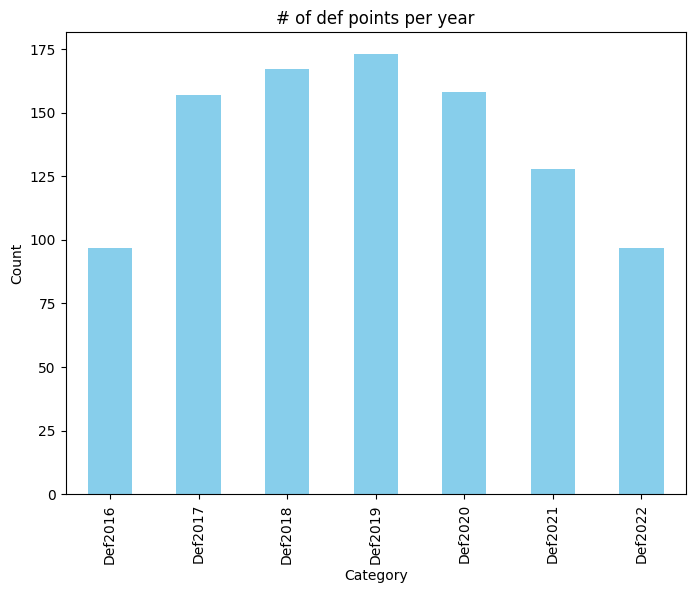

In [37]:
#select the values you want to plot
values_to_plot = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022']

# Filter the DataFrame to include only the selected values
filtered_df = merged_ceo_nodup[merged_ceo_nodup['Ref_Change_Year_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
defvalue_counts = filtered_df['Ref_Change_Year_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
defvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of def points per year')

# Show the plot
plt.show()

##### plot degradation points by year

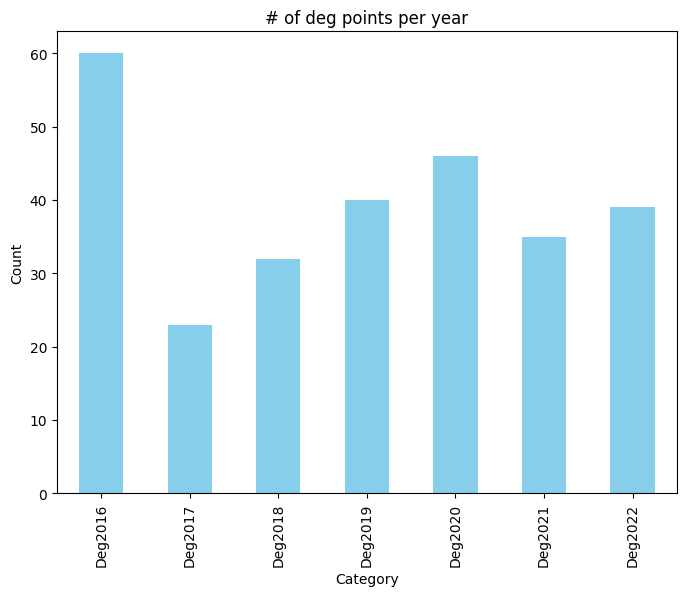

In [38]:
#plot DEG 
#select the values you want to plot
values_to_plot = ['Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022']

# Filter the DataFrame to include only the selected values
filtered_df = merged_ceo_nodup[merged_ceo_nodup['Ref_Change_Year_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
degvalue_counts = filtered_df['Ref_Change_Year_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
degvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of deg points per year')

# Show the plot
plt.show()

In [39]:
print(merged_ceo_nodup.dtypes)

plotid                    int64
sampleid                  int64
lon                     float64
lat                     float64
sample_geom              object
point_id                  int64
Ref_FNF_2015             object
Ref_Regeneration         object
Ref_Change_1522          object
Ref_Change_Type_1522     object
ArtFor                   object
ArtMine                  object
InfraR                   object
Urb                      object
IndFor                   object
Other                    object
Other_Desc               object
IndMine                  object
IndAg                    object
ArtAg                    object
Ref_Year_1522           float64
Ref_NFtype               object
Ref_Ftype                object
collection                int64
interpreted               int64
Ref_LCover               object
Ref_Change_Year_1522     object
Def2016                   int64
Def2017                   int64
Def2018                   int64
Def2019                   int64
Def2020 

In [40]:
columns_to_convert = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022','Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022','NF']
merged_ceo_nodup[columns_to_convert] = merged_ceo_nodup[columns_to_convert].fillna(0)
merged_ceo_nodup[columns_to_convert] = merged_ceo_nodup[columns_to_convert].astype(int)

### 4. export ceo data to one csv file

In [41]:
merged_ceo_nodup.to_csv(ceo_data_out,index_label='ID')